In [1]:
from sympy import *
from sympy.plotting import plot3d
init_printing(use_unicode=True)
from mpmath import mp
import numpy as np
import matplotlib.pyplot as plt

Set up matrix

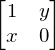

In [7]:
x, y = symbols('x y')
M = Matrix([[1, y], [x, 0]])
M

Pick a starting point

In [103]:
starting_point = Matrix([1, 2])
constant_step_size = 0.05
num_angles = 4

In [23]:
def get_direction(length, theta):
    return length*Matrix([sin(theta), cos(theta)])

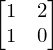

In [21]:
current_point = starting_point

Mp = M.subs([(x, current_point[0]), (y, current_point[1])])

Mp

In [69]:
def find_minimum_angle(current_point):
    angles = []
    norms = []

    for angle_i in range(num_angles):
        angle = 2*pi*angle_i/num_angles
        nearby = current_point + get_direction(step_size, angle)
        Mp = M.subs([(x, nearby[0]), (y, nearby[1])]).evalf()
        S = mp.svd_r(Mp, compute_uv = False)
        angles.append(angle.evalf())
        norms.append(mp.norm(S,1))
        
    norms = np.array(norms)
        
    return angles[norms.argmin()]

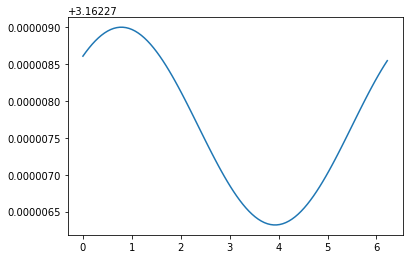

In [64]:
find_minimum_angle(current_point)
plt.plot(angles,norms)

In [62]:
norms = np.array(norms)
norms.argmin()
min_angle = angles[norms.argmin()] # yeah, there's probably a faster way to find minimizing direction

In [130]:
starting_point = Matrix([1, 3])
constant_step_size = 0.05
num_angles = 10

current_point = starting_point
Mp = M.subs([(x, current_point[0]), (y, current_point[1])])
prev_norm = mp.norm(mp.svd_r(Mp, compute_uv = False), 1)

X = []
Y = []

for i in range(100):
    X.append(current_point[0])
    Y.append(current_point[1])
    
    Mp = M.subs([(x, current_point[0]), (y, current_point[1])])
    cur_norm = mp.norm(mp.svd_r(Mp, compute_uv = False), 1)
    diff = cur_norm - prev_norm
    if diff > 0:
        break
    
    print(i, cur_norm, diff)
    prev_norm = cur_norm
    
    step_size = constant_step_size
    
    angle = find_minimum_angle(current_point)
    direction = get_direction(step_size, angle)
    current_point = current_point + direction


0 4.12310562561766 0.0
1 4.05538613976817 -0.0677194858494925
2 3.98773980693689 -0.0676463328312824
3 3.92017041410392 -0.0675693928329619
4 3.85268200945574 -0.0674884046481803
5 3.78527892485265 -0.0674030846030966
6 3.71796580060451 -0.0673131242481326
7 3.6507476128291 -0.0672181877754117
8 3.58362970370426 -0.0671179091248417
9 3.51661781496754 -0.0670118887367237
10 3.44971812506531 -0.0668996899022272
11 3.38293729040942 -0.0667808346558867
12 3.31628249126377 -0.0666547991456508
13 3.24976148285749 -0.0665210084062813
14 3.1833826524072 -0.0663788304502932
15 3.11715508282978 -0.0662275695774213
16 3.05108862404182 -0.0660664587879549
17 2.98519397287426 -0.0658946511675604
18 2.91948276278413 -0.0657112100901309
19 2.85396766472292 -0.065515098061212
20 2.78866250072608 -0.0653051639968432
21 2.72358237202569 -0.0650801287003824
22 2.65874380376219 -0.0648385682634984
23 2.59416490868643 -0.064578895075762
24 2.52986557260614 -0.0642993360802917
25 2.46586766474541 -0.0639979

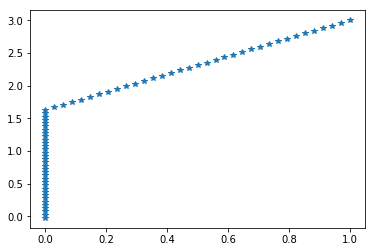

In [131]:
plt.plot(X,Y,'*')

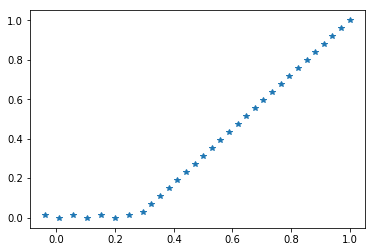

In [129]:
plt.plot(X,Y,'*')

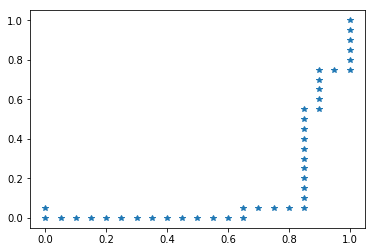

In [127]:
plt.plot(X,Y,'*')

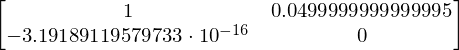

In [124]:
M.subs([(x, current_point[0]), (y, current_point[1])])

In [114]:
Mnp = np.array(M.subs([(x, current_point[0]), (y, current_point[1])]))

In [109]:
mp.svd(M.subs([(x, current_point[0]), (y, current_point[1])]), compute_uv = False)

matrix(
[['1.00124921972504'],
 ['1.59395439862305e-17']])

In [110]:
mp.svd(M.subs([(x, 0), (y, 0)]), compute_uv = False)

matrix(
[['1.0'],
 ['0.0']])

In [121]:
np.matrix.round(Mnp)

AttributeError: 'One' object has no attribute 'rint'

In [122]:
Mnp

array([[1, 0.0499999999999987],
       [-3.19189119579733e-16, 0]], dtype=object)